In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ddfUtils import *
from ddfRoot import *
from sndUtils import *
from scipy import odr
from scipy.special import erfc

plt.style.use("root")

In [33]:
nTracks = pd.read_csv("/eos/user/i/idioniso/mfout/nTracks_all.csv")
nTracks = nTracks.rename(columns={"run": "Run"})
for col in nTracks.columns:
    nTracks[col] = nTracks[col].astype("Int64")

nTracks.head()

,Run,nTracks1,nTracks1Total,nTracks11,nTracks11Total,nTracks3,nTracks3Total,nTracks13,nTracks13Total,scale
0,5888,3019644,3020611,3090889,3091983,3064935,3067724,2970038,2972351,1
1,6977,2255,2449,2151,2340,2178,2362,2034,2207,100
2,6981,1547,1663,1482,1595,1448,1560,1376,1487,100
3,6992,1468,1612,1402,1539,1427,1567,1337,1466,100
4,7001,871,941,827,897,840,918,800,867,100


In [ ]:
tmp2023 = nTracks.query("Run <  10000 and Run!=8329 and Run!=5888")
tmp2024 = nTracks.query("Run >= 10000 and Run!=8329 and Run!=5888")

ratios, labels = {2023: [], 2024: []}, []

# plt.figure(figsize=(10, 6))
for tt in (11, 3, 13):
    ratio = tmp[f"nTracks{tt}"]/tmp[f"nTracks1"]
    label = f"Ratio: {tt}/1"
    ratios[2023].append(ratio)
    labels.append(label)
    # plt.plot(
    #     tmp["Run"],
    #     ratio,
    #     label=label, linestyle=":",
    #     marker="s", alpha=0.5
    # )

# plt.xlabel("Run")
# plt.ylabel("Number of tracks")
# plt.legend()
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_274124/221860908.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratios, labels=labels)


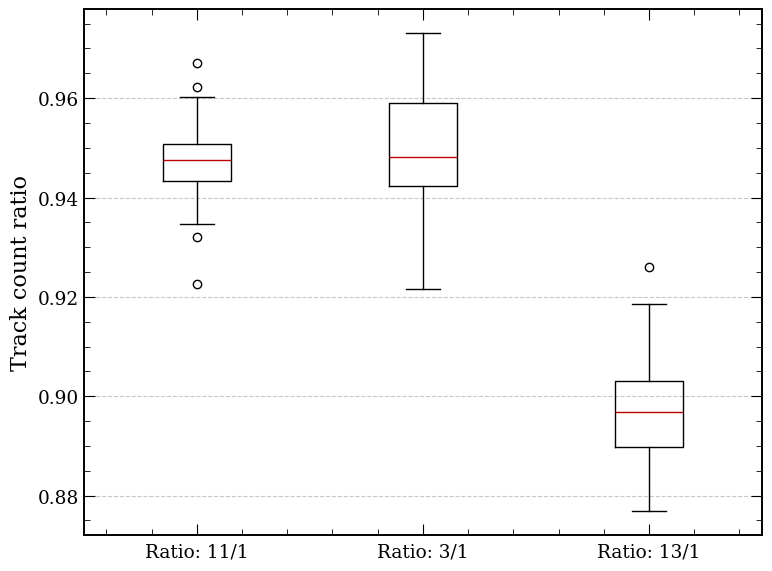

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(ratios, labels=labels)
plt.ylabel("Track count ratio")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
data = []
xtick_labels = []
positions = []


offset = 0.3
base_positions = range(1, len(labels)+1)


for i, pos in enumerate(base_positions):
    data.append(ratios[2023][i])
    positions.append(pos - offset)
    xtick_labels.append(f"{labels[i]}\n2023")

    data.append(ratios[2024][i])
    positions.append(pos + offset)
    xtick_labels.append(f"{labels[i]}\n2024")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(data, positions=positions, widths=0.25, patch_artist=True)


colors = ['lightblue', 'lightgreen'] * len(labels)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(positions, xtick_labels, rotation=45)

plt.ylabel("Track count ratio")
plt.title("Track Count ratios for 2023 vs 2024")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()